- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [4]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

In [5]:
# On sélectionne les variables quantitatives et on les convertit en forme verticale
x=data1.iloc[:,1:9].values
x

array([[1.4069e+04, 2.7820e+01, 2.1430e+01, ..., 1.7700e+00, 7.7000e-01,
        4.9300e+00],
       [1.4053e+04, 2.8490e+01, 2.1260e+01, ..., 1.7900e+00, 1.0200e+00,
        4.8400e+00],
       [1.4025e+04, 2.8350e+01, 1.9990e+01, ..., 1.6300e+00, 8.0000e-01,
        4.9500e+00],
       ...,
       [3.4039e+04, 4.4550e+01, 1.1010e+01, ..., 6.4000e-01, 2.5980e+01,
        2.9200e+00],
       [1.4044e+04, 4.7600e+01, 1.0430e+01, ..., 5.6000e-01, 2.4470e+01,
        2.7600e+00],
       [1.4045e+04, 4.6840e+01, 9.9100e+00, ..., 5.7000e-01, 2.5480e+01,
        2.8100e+00]])

In [6]:
# On sélectionne la variable catégorielle et on la convertit en format vertical
y = data1.iloc[:,0].values
y

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G

In [7]:
#on centre-réduit les valeurs
x = StandardScaler().fit_transform(x)
x

array([[-0.97421164, -1.37181459,  1.25418127, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-0.97651337, -1.30156227,  1.22771661, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-0.98054139, -1.31624186,  1.03000998, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 1.89863118,  0.3823963 , -0.36794707, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [-0.97780809,  0.70220164, -0.45823828, ..., -0.29588362,
         0.08918137, -0.82552504],
       [-0.97766423,  0.62251244, -0.53918903, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [8]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [9]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [10]:
# Visualisation de la matrice dans le nouveau repére
principaldata1 = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldata1.head(2)

Axe principal 1  Axe principal 2
0         5.029003         2.683866
1         5.042441         2.533955

In [11]:
# Constitution de la matrice finale avec la variable qualitative

finaldata1 = pd.concat([principaldata1, data1[['brand']]], axis = 1)
finaldata1.head(2)

Axe principal 1  Axe principal 2 brand
0         5.029003         2.683866     A
1         5.042441         2.533955     A

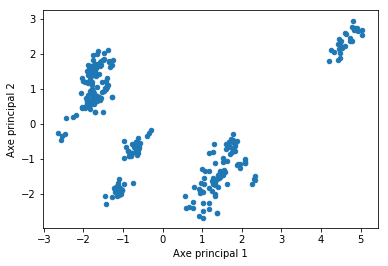

In [12]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldata1.plot.scatter(x='Axe principal 1', y='Axe principal 2')

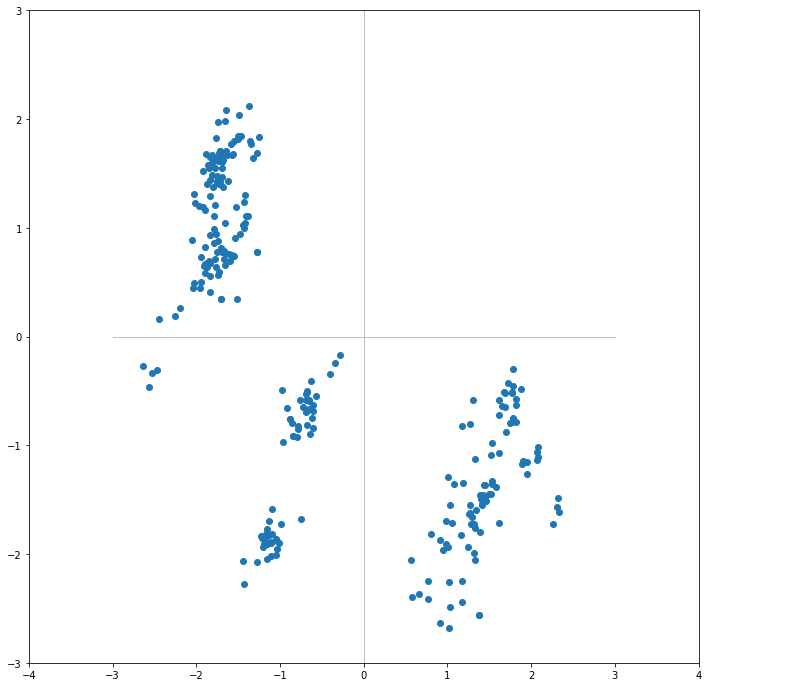

In [13]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(principalComponents[:,0],principalComponents[:,1])

#placement des étiquettes des observations
for i in range(9):
     plt.annotate(data1.index[i],(principalComponents[i,0]+0.1,principalComponents[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

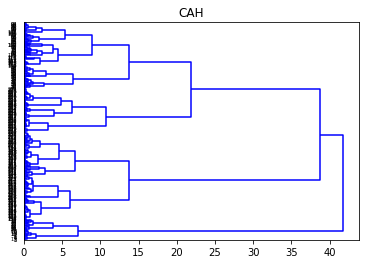

In [14]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#générer la matrice des liens

Z = linkage(x,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=data1.index,orientation='right',color_threshold=0)
plt.show()

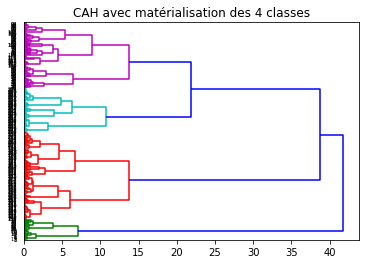

In [15]:
#matérialisation des 4 classes (hauteur t = 15)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=data1.index,orientation='right',color_threshold=15)
plt.show()

In [24]:
#découpage à la hauteur t = 15 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=15,criterion='distance')
print(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


In [25]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus afin d'avoir des classes de taille proche
kmeans.fit(x)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data1.index[idk],kmeans.labels_[idk]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
      0
0   299
0   266
0   265
0   264
0   263
0   262
0   261
0   260
0   259
0   258
0   257
0   256
0   255
0   254
0   253
0   252
0   251
0   250
0   249
0   248
0   247
0   246
0   245
0   244
0   243
0   242
0   241
0   240
0   267
0   239
..  ...
3   203
3   204
3   205
3   206
3   207
3   188
3   209
3   187
3   185
3   165
3   166
3   167
3   168
3   169
3   170
3   171
3   17

In [26]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x),index = data1.index)
print(dist_data)

            0         1         2         3
0    7.245334  1.084128  5.518734  7.000779
1    7.175865  1.078591  5.429164  6.989220
2    7.072164  1.044233  5.373187  6.796957
3    6.584829  0.980251  4.876037  6.395889
4    6.534246  1.019430  4.787142  6.378984
5    6.546098  0.977424  4.817685  6.413192
6    6.348402  1.064233  4.603862  6.205337
7    6.878162  1.051571  5.135637  6.703870
8    7.110610  1.017101  5.414391  6.846882
9    7.160963  1.047292  5.424052  6.894501
10   7.148756  1.076950  5.438131  6.842545
11   7.190573  1.073497  5.472589  6.890122
12   6.868519  1.019455  5.174707  6.585299
13   6.538098  0.966931  4.861350  6.354933
14   6.366229  0.576898  4.720537  6.322135
15   6.763956  0.702155  5.216804  6.703196
16   6.191232  0.886445  4.537966  6.292723
17   5.943803  1.000933  4.376453  6.061666
18   6.271913  0.824093  4.584481  6.333667
19   6.524972  0.632686  4.930640  6.503601
20   7.315880  2.057557  5.933282  7.140517
21   7.179836  1.983722  5.78348

In [27]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2    3
row_0                 
1       0  29   0    0
2       0   0   0  120
3      61   0   0    0
4       0   0  90    0

# Partie 2

In [4]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [5]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

### Utiliser ce modèle et comparer

In [7]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)